In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Final Sales Data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Promotions'] = df['Promotions'].astype('category')
df['Day'] = df['Day'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Season'] = df['Season'].astype('category')
df = df.dropna()
time_series_data = df.groupby('Order Date')['Sales Quantity'].sum()
X = df[['Product Price', 'Facebook Impressions', 'Google Clicks']]
y = df['Sales Quantity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

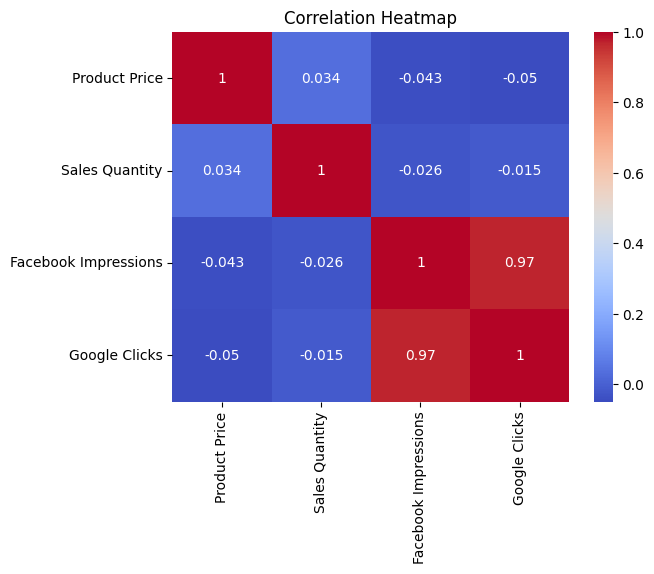

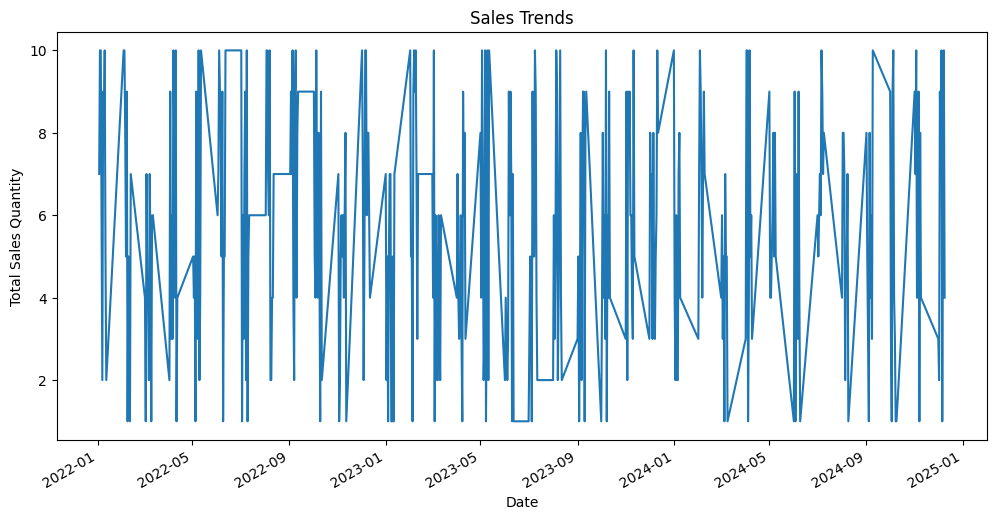

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap
numeric_cols = ['Product Price', 'Sales Quantity', 'Facebook Impressions', 'Google Clicks']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Sales trends over time
time_series_data.plot(title='Sales Trends', figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Total Sales Quantity")
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Metrics - RMSE: 3.263, MAE: 3.007, MAPE: 1.219
Model Accuracy (based on MAE): 96.99%


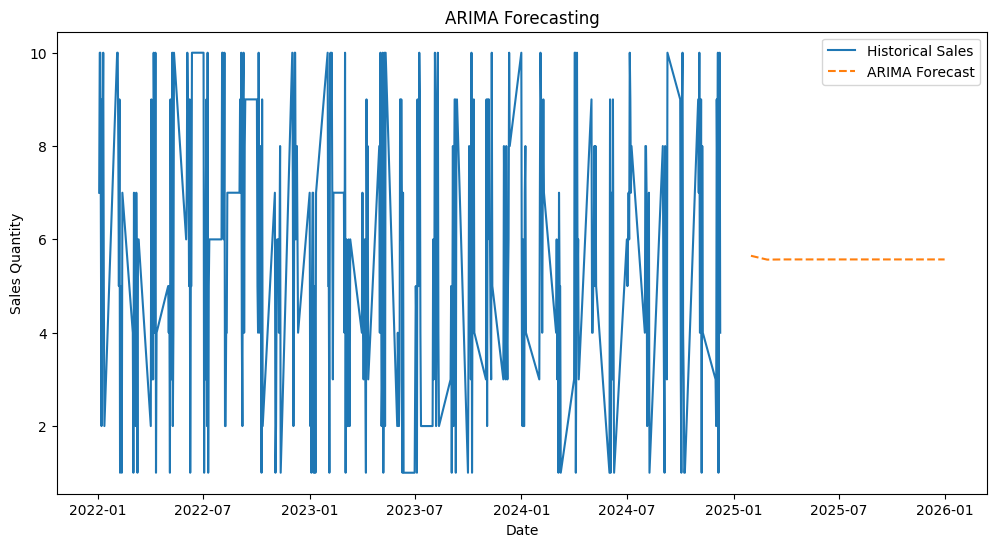

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
# ARIMA Model
arima_model = ARIMA(time_series_data, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)
# Metrics for ARIMA
def evaluate_forecast(true, predicted):
    true = true[-len(predicted):]
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(np.mean((true - predicted) ** 2))
    mape = np.mean(np.abs((true - predicted) / true))
    return rmse, mae, mape
arima_metrics = evaluate_forecast(time_series_data.values, arima_forecast)
rmse, mae, mape = arima_metrics
accuracy = 100 - mae
print(f"ARIMA Metrics - RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.3f}")
print(f"Model Accuracy (based on MAE): {accuracy:.2f}%")
# ARIMA Visualization
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Historical Sales")
plt.plot(pd.date_range(time_series_data.index[-1], periods=13, freq='M')[1:], arima_forecast, label="ARIMA Forecast", linestyle="--")
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<

SARIMA Metrics - RMSE: 3.021, MAE: 2.652, MAPE: 1.122
Model Accuracy (based on MAE): 97.35%


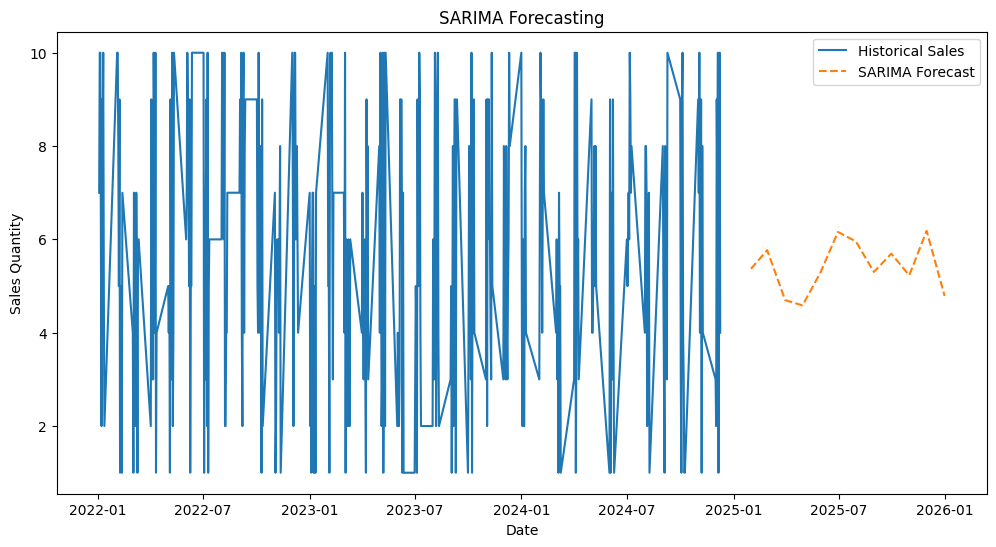

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# SARIMA Model
sarima_model = SARIMAX(time_series_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=12)
sarima_metrics = evaluate_forecast(time_series_data.values, sarima_forecast)
rmse, mae, mape = sarima_metrics
accuracy = 100 - mae
print(f"SARIMA Metrics - RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.3f}")
print(f"Model Accuracy (based on MAE): {accuracy:.2f}%")
# SARIMA Visualization
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Historical Sales")
plt.plot(pd.date_range(time_series_data.index[-1], periods=13, freq='M')[1:], sarima_forecast, label="SARIMA Forecast", linestyle="--")
plt.title("SARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()


Random Forest Metrics - RMSE: 2.971, MAE: 2.509, MAPE: 0.558
Model Accuracy (based on MAE): 97.49%


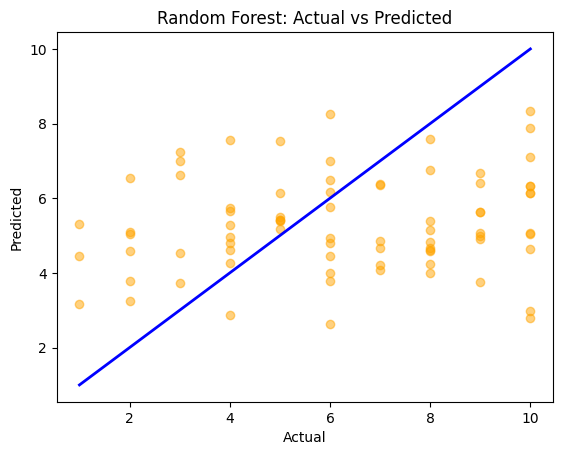

In [13]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = evaluate_forecast(y_test, rf_pred)
rmse, mae, mape = rf_metrics
accuracy = 100 - mae
print(f"Random Forest Metrics - RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.3f}")
print(f"Model Accuracy (based on MAE): {accuracy:.2f}%")
# Random Forest Visualization
plt.scatter(y_test, rf_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Gradient Boosting Metrics - RMSE: 2.996, MAE: 2.565, MAPE: 0.594
Model Accuracy (based on MAE): 97.43%


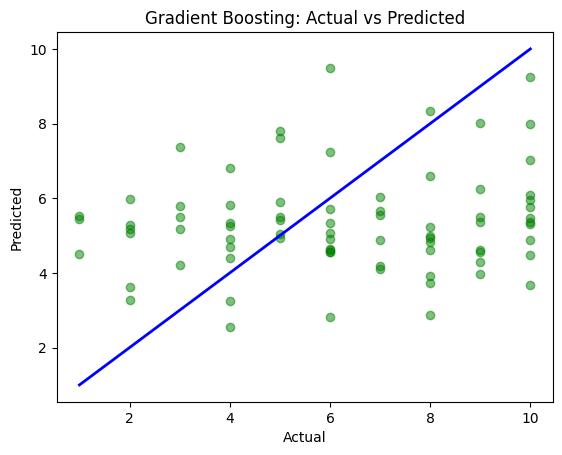

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_metrics = evaluate_forecast(y_test, gb_pred)
rmse, mae, mape = gb_metrics
accuracy = 100 - mae
print(f"Gradient Boosting Metrics - RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.3f}")
print(f"Model Accuracy (based on MAE): {accuracy:.2f}%")
# Gradient Boosting Visualization
plt.scatter(y_test, gb_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.title("Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

XGBoost Metrics - RMSE: 3.068, MAE: 2.575, MAPE: 0.554
Model Accuracy (based on MAE): 97.43%


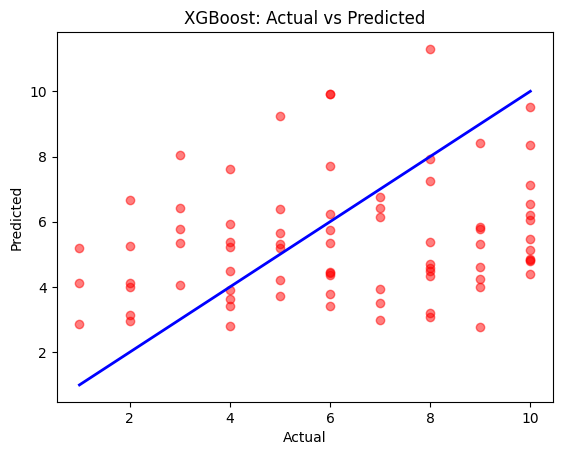

In [15]:
from xgboost import XGBRegressor
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_metrics = evaluate_forecast(y_test, xgb_pred)
rmse, mae, mape = xgb_metrics
accuracy = 100 - mae
print(f"XGBoost Metrics - RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.3f}")
print(f"Model Accuracy (based on MAE): {accuracy:.2f}%")
# XGBoost Visualization
plt.scatter(y_test, xgb_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA - RMSE: 3.291, MAE: 3.031, MAPE: 1.171, Accuracy: 96.97%
SARIMA - RMSE: 3.474, MAE: 3.166, MAPE: 1.183, Accuracy: 96.83%
Random Forest - RMSE: 2.983, MAE: 2.475, MAPE: 0.555, Accuracy: 97.53%
Gradient Boosting - RMSE: 2.880, MAE: 2.480, MAPE: 0.589, Accuracy: 97.52%
XGBoost - RMSE: 3.165, MAE: 2.712, MAPE: 0.565, Accuracy: 97.29%


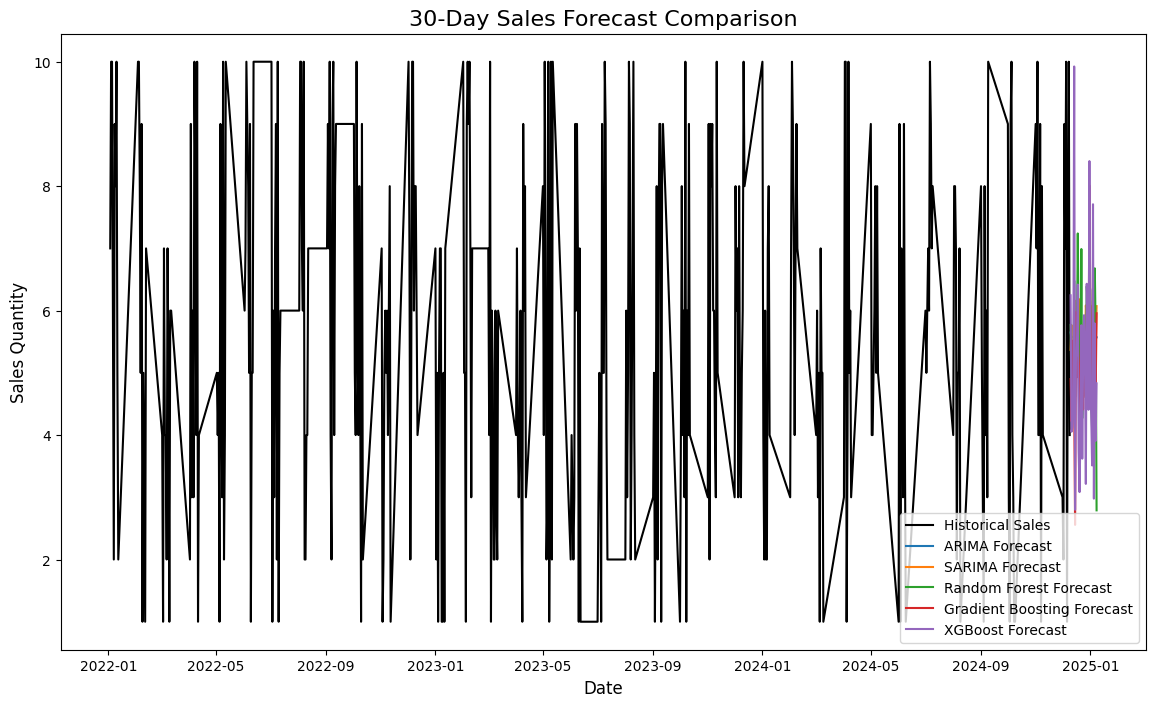


Best Model Based on Accuracy: Random Forest with Accuracy: 97.53%


In [16]:
# Extend each model's forecast to predict the next 30 days
forecast_models = {
    "ARIMA": arima_fit.forecast(steps=30),
    "SARIMA": sarima_fit.forecast(steps=30),
    "Random Forest": rf_model.predict(X_test[:30]),
    "Gradient Boosting": gb_model.predict(X_test[:30]),
    "XGBoost": xgb_model.predict(X_test[:30])
}

metrics = {}
for model_name, forecast in forecast_models.items():

    if model_name in ["ARIMA", "SARIMA"]:
        y_true = time_series_data.values[-30:]
    else:
        y_true = y_test[:30]

    rmse, mae, mape = evaluate_forecast(y_true, forecast)
    accuracy = 100 - mae
    metrics[model_name] = {"RMSE": rmse, "MAE": mae, "MAPE": mape, "Accuracy": accuracy}
for model_name, m in metrics.items():
    print(f"{model_name} - RMSE: {m['RMSE']:.3f}, MAE: {m['MAE']:.3f}, MAPE: {m['MAPE']:.3f}, Accuracy: {m['Accuracy']:.2f}%")
# Visualize 30-day forecasts
plt.figure(figsize=(14, 8))
plt.plot(time_series_data.index, time_series_data, label="Historical Sales", color='black')
# Plot forecasts for each model
for model_name, forecast in forecast_models.items():
    forecast_dates = pd.date_range(time_series_data.index[-1], periods=31, freq='D')[1:]  # Next 30 days
    plt.plot(forecast_dates, forecast, label=f"{model_name} Forecast")
# Final plot settings
plt.title("30-Day Sales Forecast Comparison", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Quantity", fontsize=12)
plt.legend()
plt.show()
best_model = max(metrics, key=lambda x: metrics[x]["Accuracy"])
print(f"\nBest Model Based on Accuracy: {best_model} with Accuracy: {metrics[best_model]['Accuracy']:.2f}%")
